In [22]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))
from scipy.io import loadmat
from pathlib import Path
import matplotlib.patches as patches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams
import numpy as np
import pandas as pd
# the following import is required for matplotlib < 3.2:
from mpl_toolkits.mplot3d import Axes3D  # noqa
from scipy import stats
import mne
import eeg_analysis.funcs4eeg as fe
import re
import imp
import ast
import behavior.func4behav as fb
imp.reload(fe)
imp.reload(fb)

<module 'behavior.func4behav' from 'c:\\Users\\Tianyi Zheng\\OneDrive - neuron.t.u-tokyo.ac.jp\\Documents\\zheng\\mywork\\attention_tES\\tes-attention\\processing\\behavior\\func4behav.py'>

In [23]:
font_size = 24
x_size = 11
y_size = 11
tmin = -0.1
tmax = 0.4

In [24]:
real_to_pick = [1, 3, 5, 9, 18]	
sham_to_pick = [6, 10, 11, 15, 16]

In [25]:
case= '3 | 4'
watch='11 stim'
real_evoked_before = []
real_evoked_after = []
sham_evoked_before = []
sham_evoked_after = []
for subject_id in real_to_pick:
    evoked_before, evoked_after = fe.pipeline_evoked_response_EMBC(subject_id, case, watch, tmin, tmax)
    real_evoked_before.append(evoked_before)
    real_evoked_after.append(evoked_after)

for subject_id in sham_to_pick:
    evoked_before, evoked_after = fe.pipeline_evoked_response_EMBC(subject_id, case, watch, tmin, tmax)
    sham_evoked_before.append(evoked_before)
    sham_evoked_after.append(evoked_after)

real_evoked_before = np.array(real_evoked_before)
real_evoked_after = np.array(real_evoked_after)
sham_evoked_before = np.array(sham_evoked_before)
sham_evoked_after = np.array(sham_evoked_after)

# Subtract the 'before' data from the 'after' data
real_evoked_sub = np.subtract(real_evoked_after, real_evoked_before)
sham_evoked_sub = np.subtract(sham_evoked_after, sham_evoked_before)
real_evoked_sub = fe.low_pass_filter(real_evoked_sub, sfreq=1200, cutoff=80, order=5)
sham_evoked_sub = fe.low_pass_filter(sham_evoked_sub, sfreq=1200, cutoff=80, order=5)
time = np.linspace(tmin, tmax, real_evoked_sub.shape[-1])

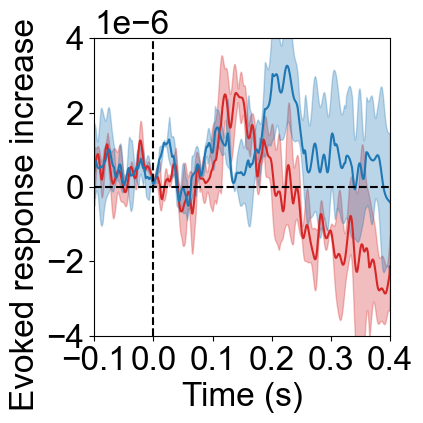

In [26]:
# Calculate the mean and standard deviation
real_mean, real_std = fe.trimmed_mean_std(real_evoked_sub, axis=0)
sham_mean, sham_std = fe.trimmed_mean_std(sham_evoked_sub, axis=0)

rc('font', family='Arial')
save_path = os.path.join('..', '..', '..','..','..', 'confNjral', 'EMBC2023', 'poster', 'figs', 'evoked_Endo.svg')
rcParams['axes.formatter.limits'] = [-3,3]  # Optional: this line adjusts the threshold for switching to scientific notation
rcParams['axes.labelsize'] = font_size
rcParams['xtick.labelsize'] = font_size
rcParams['ytick.labelsize'] = font_size

# Create a new figure
fig, ax = plt.subplots(figsize=(x_size/2.54, y_size/2.54)) # Sizes are in inches

# Plot the mean for real and sham data with shaded std deviation
plt.plot(time, real_mean, color='#d62728', label='real')
plt.fill_between(time, real_mean - real_std, real_mean + real_std, color='#d62728', alpha=0.3)

plt.plot(time, sham_mean, color='#1f77b4', label='sham')
plt.fill_between(time, sham_mean - sham_std, sham_mean + sham_std, color='#1f77b4', alpha=0.3)

# Add a vertical dashed line at time=0s
plt.axvline(x=0, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='--')


# Add labels, a title, and a legend
plt.xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4], fontsize=font_size)

y_tick = np.linspace(-4, 4, 5)*1e-6
plt.yticks(y_tick, fontsize=font_size)

plt.xlim([time[0], time[-1]])
plt.xlabel('Time (s)', fontsize=font_size)
plt.ylabel('Evoked response increase      ', fontsize=font_size)
plt.ylim(-4*1e-06, 4*1e-06)
# plt.legend(fontsize=font_size)

plt.tight_layout()  # Adjust layout to fit labels
plt.savefig(save_path, format='svg')

# Display the plot
plt.show()


## Exo

In [27]:
case= '5 | 6'
watch='11 stim'
real_evoked_before = []
real_evoked_after = []
sham_evoked_before = []
sham_evoked_after = []
for subject_id in real_to_pick:
    evoked_before, evoked_after = fe.pipeline_evoked_response_EMBC(subject_id, case, watch, tmin, tmax)
    real_evoked_before.append(evoked_before)
    real_evoked_after.append(evoked_after)

for subject_id in sham_to_pick:
    evoked_before, evoked_after = fe.pipeline_evoked_response_EMBC(subject_id, case, watch, tmin, tmax)
    sham_evoked_before.append(evoked_before)
    sham_evoked_after.append(evoked_after)

real_evoked_before = np.array(real_evoked_before)
real_evoked_after = np.array(real_evoked_after)
sham_evoked_before = np.array(sham_evoked_before)
sham_evoked_after = np.array(sham_evoked_after)

# Subtract the 'before' data from the 'after' data
real_evoked_sub = np.subtract(real_evoked_after, real_evoked_before)
sham_evoked_sub = np.subtract(sham_evoked_after, sham_evoked_before)
real_evoked_sub = fe.low_pass_filter(real_evoked_sub, sfreq=1200, cutoff=80, order=5)
sham_evoked_sub = fe.low_pass_filter(sham_evoked_sub, sfreq=1200, cutoff=80, order=5)
time = np.linspace(tmin, tmax, real_evoked_sub.shape[-1])

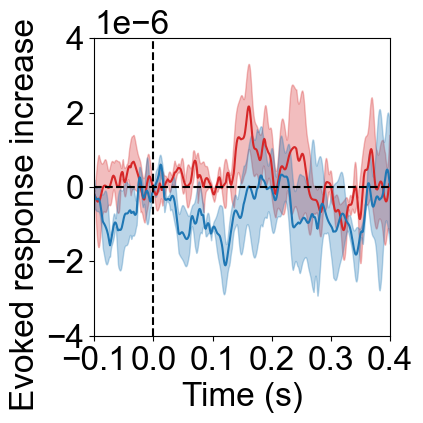

In [28]:
# Calculate the mean and standard deviation
real_mean, real_std = fe.trimmed_mean_std(real_evoked_sub, axis=0)
sham_mean, sham_std = fe.trimmed_mean_std(sham_evoked_sub, axis=0)

rc('font', family='Arial')
save_path = os.path.join('..', '..', '..','..','..', 'confNjral', 'EMBC2023', 'poster', 'figs', 'evoked_Exo.svg')
rcParams['axes.formatter.limits'] = [-3,3]  # Optional: this line adjusts the threshold for switching to scientific notation
rcParams['axes.labelsize'] = font_size
rcParams['xtick.labelsize'] = font_size
rcParams['ytick.labelsize'] = font_size

# Create a new figure
fig, ax = plt.subplots(figsize=(x_size/2.54, y_size/2.54)) # Sizes are in inches

# Plot the mean for real and sham data with shaded std deviation
plt.plot(time, real_mean, color='#d62728', label='real')
plt.fill_between(time, real_mean - real_std, real_mean + real_std, color='#d62728', alpha=0.3)

plt.plot(time, sham_mean, color='#1f77b4', label='sham')
plt.fill_between(time, sham_mean - sham_std, sham_mean + sham_std, color='#1f77b4', alpha=0.3)

# Add a vertical dashed line at time=0s
plt.axvline(x=0, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='--')


# Add labels, a title, and a legend
plt.xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4], fontsize=font_size)

y_tick = np.linspace(-4, 4, 5)*1e-6
plt.yticks(y_tick, fontsize=font_size)

plt.xlim([time[0], time[-1]])
plt.xlabel('Time (s)', fontsize=font_size)
plt.ylabel('Evoked response increase      ', fontsize=font_size)
plt.ylim(-4*1e-06, 4*1e-06)
# plt.legend(fontsize=font_size)

plt.tight_layout()  # Adjust layout to fit labels
plt.savefig(save_path, format='svg')

# Display the plot
plt.show()
